## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

mtcaic3_path = kagglehub.competition_download('mtcaic3')

print('Data source import complete.')

# move data to content data
import shutil
shutil.move(mtcaic3_path,'/content/mtcaic3')
print('Data moved successfully.')

100%|██████████| 533M/533M [00:07<00:00, 78.5MB/s]

Extracting files...


Data source import complete.
Data moved successfully.


In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

base_path = '/content/mtcaic3'

train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))
validation_df = pd.read_csv(os.path.join(base_path, 'validation.csv'))
test_df = pd.read_csv(os.path.join(base_path, 'test.csv'))

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


In [ ]:
X_train_MI_gyro = []
X_val_MI_gyro = []
X_test_MI_gyro= []


In [ ]:
X_train_MI = []
X_val_MI= []
X_test_MI= []

In [ ]:
# load training data
eeg_channels =  ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']


for i in tqdm(range(len(train_df))):

    row = train_df.iloc[i]
    task = row['task']
    if task != 'MI':
      continue
    subject_id = row['subject_id']
    session = row['trial_session']
    trial_num = row['trial']
    label = row['label']

    # Choose number of samples per trial
    samples_per_trial = 2250

    # Path to EEGdata.csv
    eeg_path = os.path.join(base_path, task, 'train', f"{subject_id}", str(session), 'EEGdata.csv')
    eeg_data = pd.read_csv(eeg_path)

    # Extract trial
    start_idx = (trial_num - 1) * samples_per_trial
    end_idx = start_idx + samples_per_trial
    trial_data = eeg_data.iloc[start_idx:end_idx]


    eeg_segment = trial_data[eeg_channels].values  # shape: (samples, 8)

    X_train_MI.append(eeg_segment)

# load validation data

for i in tqdm(range(len(validation_df))):

    row = validation_df.iloc[i]
    task = row['task']
    if task != 'MI':
      continue
    subject_id = row['subject_id']
    session = row['trial_session']
    trial_num = row['trial']

    label = row['label']

    samples_per_trial = 2250

    eeg_path = os.path.join(base_path, task, 'validation', f"{subject_id}", str(session), 'EEGdata.csv')
    eeg_data = pd.read_csv(eeg_path)

    start_idx = (trial_num - 1) * samples_per_trial
    end_idx = start_idx + samples_per_trial
    trial_data = eeg_data.iloc[start_idx:end_idx]

    eeg_segment = trial_data[eeg_channels].values

    X_val_MI.append(eeg_segment)

# load test data

for i in tqdm(range(len(test_df))):

    row = test_df.iloc[i]
    task = row['task']
    if task != 'MI':
      continue
    subject_id = row['subject_id']
    session = row['trial_session']
    trial_num = row['trial']
    id_num = row['id']
    # Choose number of samples per trial
    samples_per_trial = 2250 if task == 'MI' else 1750

    # Path to EEGdata.csv
    eeg_path = os.path.join(base_path, task, 'test', f"{subject_id}", str(session), 'EEGdata.csv')
    eeg_data = pd.read_csv(eeg_path)

    # Extract trial
    start_idx = (trial_num - 1) * samples_per_trial
    end_idx = start_idx + samples_per_trial
    trial_data = eeg_data.iloc[start_idx:end_idx]

    eeg_segment = trial_data[eeg_channels].values  # shape: (samples, 5)

    X_test_MI.append(eeg_segment)


In [ ]:
# load training data
eeg_channels = ['Gyro1', 'Gyro2', 'Gyro3' ]

for i in tqdm(range(len(train_df))):

    row = train_df.iloc[i]
    task = row['task']
    if task != 'MI':
      continue
    subject_id = row['subject_id']
    session = row['trial_session']
    trial_num = row['trial']
    label = row['label']

    # Choose number of samples per trial
    samples_per_trial = 2250

    # Path to EEGdata.csv
    eeg_path = os.path.join(base_path, task, 'train', f"{subject_id}", str(session), 'EEGdata.csv')
    eeg_data = pd.read_csv(eeg_path)

    # Extract trial
    start_idx = (trial_num - 1) * samples_per_trial
    end_idx = start_idx + samples_per_trial
    trial_data = eeg_data.iloc[start_idx:end_idx]


    eeg_segment = trial_data[eeg_channels].values  # shape: (samples, 8)

    X_train_MI_gyro.append(eeg_segment)

# load validation data

for i in tqdm(range(len(validation_df))):

    row = validation_df.iloc[i]
    task = row['task']
    if task != 'MI':
      continue
    subject_id = row['subject_id']
    session = row['trial_session']
    trial_num = row['trial']

    label = row['label']

    samples_per_trial = 2250

    eeg_path = os.path.join(base_path, task, 'validation', f"{subject_id}", str(session), 'EEGdata.csv')
    eeg_data = pd.read_csv(eeg_path)

    start_idx = (trial_num - 1) * samples_per_trial
    end_idx = start_idx + samples_per_trial
    trial_data = eeg_data.iloc[start_idx:end_idx]

    eeg_segment = trial_data[eeg_channels].values

    X_val_MI_gyro.append(eeg_segment)

# load test data

for i in tqdm(range(len(test_df))):

    row = test_df.iloc[i]
    task = row['task']
    if task != 'MI':
      continue
    subject_id = row['subject_id']
    session = row['trial_session']
    trial_num = row['trial']
    id_num = row['id']
    # Choose number of samples per trial
    samples_per_trial = 2250 if task == 'MI' else 1750

    # Path to EEGdata.csv
    eeg_path = os.path.join(base_path, task, 'test', f"{subject_id}", str(session), 'EEGdata.csv')
    eeg_data = pd.read_csv(eeg_path)

    # Extract trial
    start_idx = (trial_num - 1) * samples_per_trial
    end_idx = start_idx + samples_per_trial
    trial_data = eeg_data.iloc[start_idx:end_idx]

    eeg_segment = trial_data[eeg_channels].values  # shape: (samples, 5)

    X_test_MI_gyro.append(eeg_segment)


100%|██████████| 100/100 [00:05<00:00, 19.17it/s]


In [ ]:
X_train_MI1_gyro = np.array(X_train_MI_gyro)
X_val_MI1_gyro = np.array(X_val_MI_gyro)
X_test_MI1_gyro = np.array(X_test_MI_gyro)

In [ ]:
# save all the arrays
# mi
os.makedirs('/content/drive/MyDrive/mtc-aic', exist_ok=True)

np.save('/content/drive/MyDrive/mtc-aic/X_train_MI.npy', X_train_MI)

np.save('/content/drive/MyDrive/mtc-aic/X_val_MI.npy', X_val_MI)

np.save('/content/drive/MyDrive/mtc-aic/X_test_MI.npy', X_test_MI)


In [ ]:
# save all the arrays
# mi
os.makedirs('/content/drive/MyDrive/mtc-aic', exist_ok=True)

np.save('/content/drive/MyDrive/mtc-aic/X_train_MI_gyro.npy', X_train_MI1_gyro)

np.save('/content/drive/MyDrive/mtc-aic/X_val_MI_gyro.npy', X_val_MI1_gyro)

np.save('/content/drive/MyDrive/mtc-aic/X_test_MI_gyro.npy', X_test_MI1_gyro)


NameError: name 'X_train_MI1_gyro' is not defined

### load from drive

In [ ]:
# Load the saved arrays

import pandas as pd
import numpy as np
import os
from tqdm import tqdm

X_train_MI1_gyro = np.load('/content/drive/MyDrive/mtc-aic/X_train_MI_gyro.npy')

X_val_MI1_gyro = np.load('/content/drive/MyDrive/mtc-aic/X_val_MI_gyro.npy')

X_test_MI1_gyro = np.load('/content/drive/MyDrive/mtc-aic/X_test_MI_gyro.npy')

print("Data loaded successfully.")

Data loaded successfully.


In [ ]:
X_train_MI1 = np.load('/content/drive/MyDrive/mtc-aic/X_train_MI.npy')
y_train_MI1 = np.load('/content/drive/MyDrive/mtc-aic/y_train_MI.npy')

X_val_MI1 = np.load('/content/drive/MyDrive/mtc-aic/X_val_MI.npy')
y_val_MI1 = np.load('/content/drive/MyDrive/mtc-aic/y_val_MI.npy')

X_test_MI1 = np.load('/content/drive/MyDrive/mtc-aic/X_test_MI.npy')

id_test_mi1 = np.arange(4901,4951)

print("Data loaded successfully.")

Data loaded successfully.


In [ ]:
left_count = 0
right_count = 0

for label in y_train_MI1:
    if label == 'Left':
        left_count += 1
    elif label == 'Right':
        right_count += 1

print("Left count:", left_count)
print("Right count:", right_count)

Left count: 1187
Right count: 1213


In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt, iirnotch, resample
from scipy.stats import zscore
from scipy.signal import decimate
import numpy as np
from scipy.signal import butter, filtfilt

import pandas as pd
import numpy as np
import os
from tqdm import tqdm

from imblearn.over_sampling import SMOTE
import numpy as np

In [ ]:
# X=X_train_MI1
# y=y_train_MI1

# n_samples, n_timesteps, n_channels = X.shape
# X_flat = X.reshape((n_samples, n_timesteps * n_channels))  # Shape: (1213, 6750)

# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_flat, y)

# X_resampled = X_resampled.reshape((1213*2, n_timesteps, n_channels))  # Shape: (?, 2250, 3)

# print("Original shape:", X.shape)
# print("Resampled shape:", X_resampled.shape)
# print("New label distribution:", np.unique(y_resampled, return_counts=True))


In [ ]:
X_train_MI1.shape
X_train_MI1_gyro.shape

(2400, 2250, 3)

## EEG signal scaling

In [ ]:
X_train_MI1 = X_train_MI1 / 1000
X_val_MI1 = X_val_MI1 / 1000
X_test_MI1 = X_test_MI1 / 1000

## gyroscope filtering

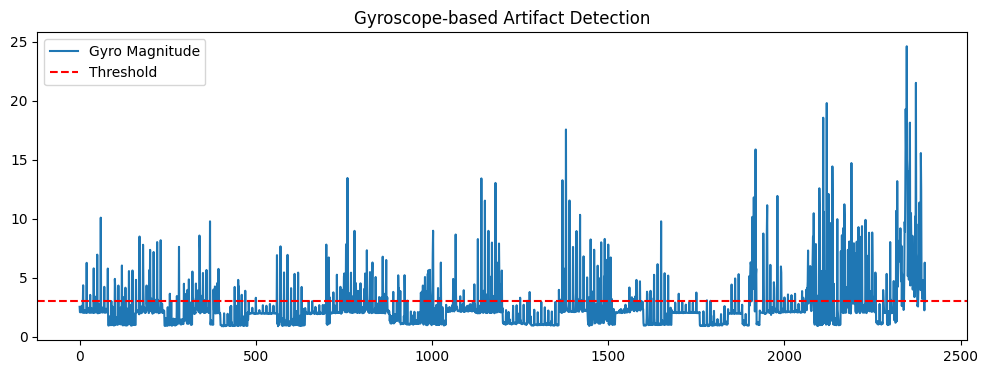

In [ ]:
# Extract gyroscope data
gyro_data = X_train_MI1_gyro

# Compute magnitude of gyroscope signal
gyro_magnitude = np.linalg.norm(gyro_data, axis=-1)
mean_magnitude_per_trial = np.mean(gyro_magnitude, axis=1)
# Define a movement threshold (tune this based on data)
threshold = 3.0  # adjust based on empirical inspection

# Find indices with movement artifacts
# artifact_indices = mean_magnitude_per_trial > threshold

# Optional: visualize where artifacts occur
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(mean_magnitude_per_trial, label='Gyro Magnitude')
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title("Gyroscope-based Artifact Detection")
plt.show()


In [ ]:
bad_trial_mask = mean_magnitude_per_trial > threshold  # Shape: (2400,)

# Step 4: Invert mask to keep only clean trials
good_trial_mask = ~bad_trial_mask

# Step 5: Apply mask to EEG data
clean_X_train_MI = X_train_MI1[good_trial_mask]
clean_X_train_MI.shape

(1963, 2250, 8)

In [ ]:
clean_y_train_MI = y_train_MI1[good_trial_mask]

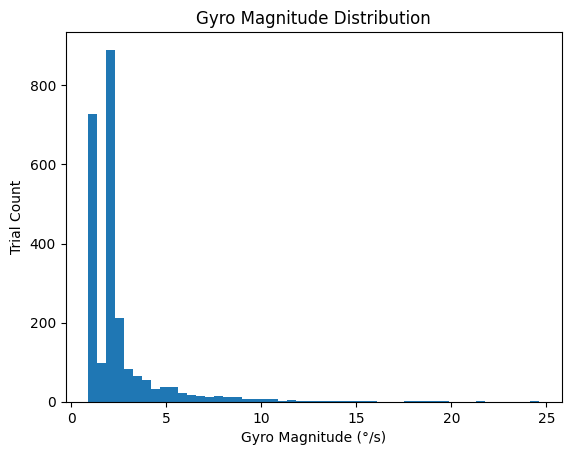

In [ ]:
import matplotlib.pyplot as plt
plt.hist(mean_magnitude_per_trial, bins=50)
plt.xlabel("Gyro Magnitude (°/s)")
plt.ylabel("Trial Count")
plt.title("Gyro Magnitude Distribution")
plt.show()

## Preprocessing

In [ ]:
# eeg_channels = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
eeg_channels = ['C3', 'CZ', 'C4']
# Gyro_channel_list = ['Gyro1', 'Gyro2', 'Gyro3']
channel_indices = {ch: i for i, ch in enumerate(eeg_channels)}
# Gyro_channel_indices = {ch2: i2 for i2, ch2 in enumerate(Gyro_channel_list)}
# Approximate neighbors (for 8 channels only, manually set)
# neighbors = {
#     'FZ': ['C3', 'CZ', 'C4'],
#     'C3': ['FZ', 'CZ', 'PZ'],
#     'CZ': ['FZ', 'C3', 'C4', 'PZ'],
#     'C4': ['FZ', 'CZ', 'PZ'],
#     'PZ': ['C3', 'CZ', 'C4', 'OZ'],
#     'PO7': ['PZ', 'OZ'],
#     'OZ': ['PZ', 'PO7', 'PO8'],
#     'PO8': ['PZ', 'OZ']
# }
neighbors = {
    'C3': [ 'CZ'],
    'CZ': [ 'C3', 'C4'],
    'C4': ['CZ'],

}

In [ ]:

def bandpass_filter(data, fs, lowcut, highcut, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

def extract_specific_bands(trial_data, fs=250):

    # bands = {
    #     "alpha": (8, 12),
    #     "beta": (16, 24),
    #     "low_gamma": (30, 35)
    # }

    bands = {
        "band": (4, 60),
    }

    # Apply band-pass for each band
    filtered_bands = []
    for name, (low, high) in bands.items():
        band = bandpass_filter(trial_data, fs, low, high)
        filtered_bands.append(band)

    # Concatenate along channels: (samples, channels × 3)
    return np.concatenate(filtered_bands, axis=1)

# Function to apply surface Laplacian (spatial filtering)
def apply_surface_laplacian(trial):
    laplacian = np.copy(trial)
    for ch_name, ch_idx in channel_indices.items():
        neigh_idxs = [channel_indices[n] for n in neighbors.get(ch_name, [])]
        if len(neigh_idxs) == 0:
            continue
        laplacian[:, ch_idx] = trial[:, ch_idx] - np.mean(trial[:, neigh_idxs], axis=1)
    return laplacian



#Normalization (Z-score)
def normalize_trial(trial):
    mean = np.mean(trial, axis=0)
    std = np.std(trial, axis=0)
    return (trial - mean) / (std + 1e-6)  # to avoid divide by zero


In [ ]:
def preprocessingData(data):
  processed = []
  for trial in data:
    # trial_processed=apply_notch(trial)
    trial_processed=extract_specific_bands(trial)
    # 4. Surface Laplacian
    trial_processed = apply_surface_laplacian(trial_processed)
    # downsample_factor=2
    # downsampled = np.empty((2250 // downsample_factor, 8))
    # for ch in range(trial.shape[1]):
    #     downsampled[ :, ch] = decimate(trial_processed[ :, ch], downsample_factor, axis=0)
    # trial_processed=normalize_trial(downsampled)
    processed.append(trial_processed)
  return np.array(processed)


In [ ]:

print("Preprocessing MI training set...")
pre_X_train_MI = preprocessingData(clean_X_train_MI)

print("Preprocessing MI validation set...")
pre_X_val_MI = preprocessingData(X_val_MI1)

print("Preprocessing MI test set...")
pre_X_test_MI = preprocessingData(X_test_MI1)

Preprocessing MI training set...
Preprocessing MI validation set...
Preprocessing MI test set...


In [ ]:
pre_X_train_MI.shape

(1963, 2250, 8)

## Energy distribution for MI data

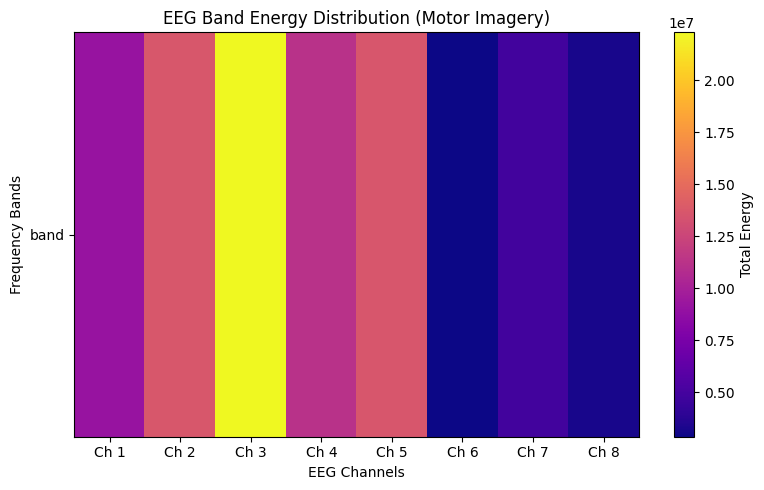

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# === SIMULATED EEG ===
eeg_data = pre_X_train_MI
# === PARAMETERS ===
bands = {
"band": (4, 60),
}
fs = 250  # Sampling frequency
n_trials, n_samples, n_channels = eeg_data.shape

# === BANDPASS FILTER FUNCTION ===
def bandpass(data, low, high, fs, order=4):
    b, a = butter(order, [low / (fs / 2), high / (fs / 2)], btype='band')
    return filtfilt(b, a, data, axis=1)

# === STEP 1: Apply filters and compute energy ===
energy = np.zeros((len(bands), n_channels))
band_names = list(bands.keys())

for i, (band_name, (low, high)) in enumerate(bands.items()):
    band_data = np.zeros_like(eeg_data)
    for ch in range(n_channels):
        band_data[:, :, ch] = bandpass(eeg_data[:, :, ch], low, high, fs)
    energy[i] = np.sum(band_data**2, axis=(0, 1))  # Total energy per channel

# === STEP 2: Plot ===
plt.figure(figsize=(8, 5))
plt.imshow(energy, aspect='auto', cmap='plasma')
plt.colorbar(label='Total Energy')
plt.xticks(np.arange(n_channels), labels=[f'Ch {i+1}' for i in range(n_channels)])
plt.yticks(np.arange(len(bands)), labels=band_names)
plt.xlabel('EEG Channels')
plt.ylabel('Frequency Bands')
plt.title('EEG Band Energy Distribution (Motor Imagery)')
plt.tight_layout()
plt.show()


## select channels

In [ ]:
channel_list = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
selected_channels = ['CZ']
# selected_channels = [ 'CZ', 'PZ']

In [ ]:
channel_indices = [channel_list.index(ch) for ch in selected_channels]

selected_indices = []
for band_offset in range(1):  # α, β, γ
    for idx in channel_indices:
        selected_indices.append(idx + band_offset * len(channel_list))

In [ ]:
pre_X_train_MI_selected_channels = pre_X_train_MI[:, :, selected_indices]
pre_X_val_MI_selected_channels   = pre_X_val_MI[:, :, selected_indices]
pre_X_test_MI_selected_channels = pre_X_test_MI[:, :, selected_indices]

In [ ]:
pre_X_train_MI_selected_channels.shape

(1963, 2250, 1)

## Feature extraction

### band power features

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt

# === Band definitions ===
bands = {
    "band": (40,60),
    # "alpha": (8, 12),
    # "beta": (16, 30),
    # # "gamma": (30, 35)
}

# === Bandpass filter ===
def bandpass(data, low, high, fs, order=4):
    nyq = 0.5 * fs
    low /= nyq
    high /= nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# === Feature Extraction Function ===
def extract_band_power_features(eeg_data, fs):
    """
    eeg_data: np.array of shape (trials, samples, channels)
    fs: sampling frequency
    Returns: features of shape (trials, bands × channels)
    """
    n_trials, n_samples, n_channels = eeg_data.shape
    features = []

    for trial in range(n_trials):
        trial_features = []
        for ch in range(n_channels):
            signal = eeg_data[trial, :, ch]
            for band_name, (low, high) in bands.items():
                filtered = bandpass(signal, low, high, fs)
                power = np.mean(filtered**2)  # band power = mean squared amplitude
                trial_features.append(power)
        features.append(trial_features)

    return np.array(features)


In [ ]:
fs = 250  # or whatever your sampling rate is
features = extract_band_power_features(eeg_data=pre_X_train_MI_selected_channels, fs=fs)
print(features.shape)

(1963, 1)


In [ ]:
features_val = extract_band_power_features(eeg_data=pre_X_val_MI_selected_channels, fs=fs)


In [ ]:
features_test = extract_band_power_features(eeg_data=pre_X_test_MI_selected_channels, fs=fs)

### Features

In [ ]:
import numpy as np
import scipy.stats as stats
from scipy.signal import welch
import pywt

# === Simulated smaller dataset for testing ===
n_trials, n_samples, n_channels = pre_X_val_MI_selected_channels.shape
eeg_data = pre_X_val_MI_selected_channels
# gyro_data = np.random.randn(n_trials, n_samples, 3)

# === Statistical Features: mean, std, skewness, kurtosis ===
def extract_statistical_features(data):
    mean = np.mean(data, axis=1)
    std = np.std(data, axis=1)
    skew = stats.skew(data, axis=1)
    kurt = stats.kurtosis(data, axis=1)
    return np.concatenate([mean, std, skew, kurt], axis=1)


# # === Wavelet Energy Features ===
def extract_wavelet_energy(data, wavelet='db4', level=3):
    features = []
    for trial in data:
        trial_feats = []
        for ch in range(trial.shape[1]):
            coeffs = pywt.wavedec(trial[:, ch], wavelet, level=level)
            energies = [np.sum(c ** 2) for c in coeffs]
            trial_feats.extend(energies)
        features.append(trial_feats)
    return np.array(features)


# === Combine All Features ===
n_trials, n_samples, n_channels = pre_X_train_MI_selected_channels.shape
eeg_data = pre_X_train_MI_selected_channels

wavelet_feats = extract_wavelet_energy(eeg_data)
features=[]
features = np.concatenate([wavelet_feats], axis=1)#, fft_feats, wavelet_feats, ratio_feats, gyro_feats

n_trials, n_samples, n_channels = pre_X_val_MI_selected_channels.shape
val_data = pre_X_val_MI_selected_channels

wavelet_feats = extract_wavelet_energy(pre_X_test_MI_selected_channels)
features_val=[]
features_val = np.concatenate([wavelet_feats], axis=1)#, fft_feats, wavelet_feats, ratio_feats, gyro_feats
print("Final feature shape:", features.shape)


Final feature shape: (1963, 4)


In [ ]:
wavelet_feats = extract_wavelet_energy(pre_X_test_MI_selected_channels)
# ratio_feats = extract_band_ratio(eeg_data)
features_val=[]
features_val = np.concatenate([wavelet_feats], axis=1)#, fft_feats, wavelet_feats, ratio_feats, gyro_feats
print("Final feature shape:", features.shape)


Final feature shape: (1963, 4)


## Models

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
yTrainMI_encoded = le.fit_transform(clean_y_train_MI)
yValMI_encoded = le.fit_transform(y_val_MI1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


### LazyClassifier

In [ ]:
!pip install lazypredict


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 10.2 MB/s eta 0:00:00


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the features and labels
# X_train, X_test, y_train, y_test = train_test_split(features, yTrainMI_encoded, test_size=0.1, random_state=42)

# Run LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(features, features_val, yTrainMI_encoded, yValMI_encoded)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

sorted_models = models.sort_values(by="Accuracy", ascending=False)
# Show results
print(sorted_models)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 978, number of negative: 985
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1963, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498217 -> initscore=-0.007132
[LightGBM] [Info] Start training from score -0.007132
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.64               0.60     0.60      0.59   
ExtraTreeClassifier                0.62               0.63     0.63      0.62   
LabelPropagation                   0.62               0.58     0.58      0.56   
LabelSpreading                     0.62               0.58     0.58      0.56   
GaussianNB                

### NuSVC model

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, classification_report

# Generate a binary classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize NuSVC
model = NuSVC(nu=0.5, kernel='rbf', gamma='scale')
# features, features_val, yTrainMI_encoded, yValMI_encoded)
# Train the model
model.fit(features, yTrainMI_encoded)




NuSVC()

In [ ]:
# Predict
y_pred = model.predict(features_val)
print(y_pred)
label_map = {0: 'Left', 1: 'Right'}
pred_labels = [label_map[i] for i in y_pred]
print(f"pred_labels: {pred_labels}")
id_test_mi = np.arange(4901,4951)
submission_df = pd.DataFrame({'id': id_test_mi, 'label': pred_labels})
submission_df.to_csv('submission_M.csv', index=False)
print("✅ Submission file saved as submission_MI.csv")
# Evaluate
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1]
pred_labels: ['Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right']
✅ Submission file saved as submission_MI.csv
